In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Patch

In [112]:
dfAccident = pd.read_csv('Resources/MoonAccidents.csv')
dfAccident = dfAccident.dropna()
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,Light,1.0,04-01-2005,12:30,Third Quarter
2,Light,1.0,04-01-2005,09:28,Third Quarter
3,Light,1.0,04-01-2005,18:48,Third Quarter
4,Light,1.0,04-01-2005,15:45,Third Quarter


In [3]:
#adding year column
dfAccident['Year'] = ''

#for every row, split the date and store the year
for index, row in dfAccident.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfAccident.at[index, 'Year'] = year

dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005


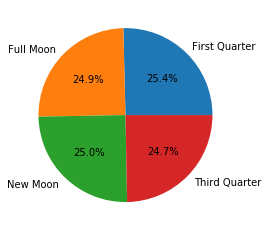

In [4]:
#group by phase and print
gPhases = dfAccident.groupby('Phase')

plt.pie(gPhases['Date'].count(), labels = gPhases.count().index, autopct='%1.1f%%')
plt.show()

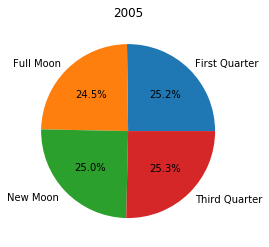

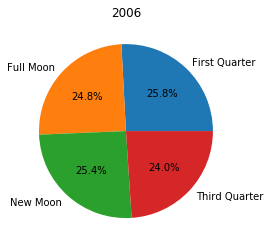

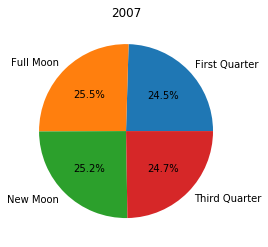

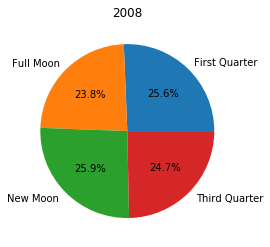

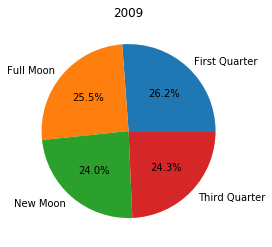

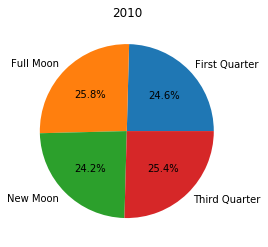

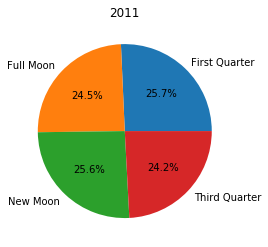

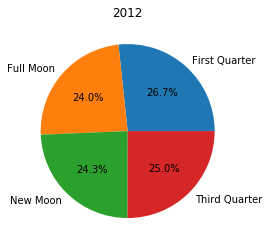

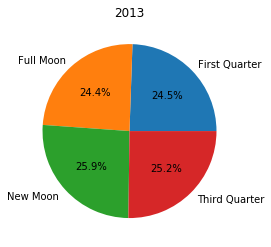

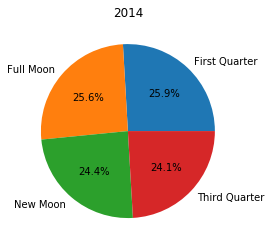

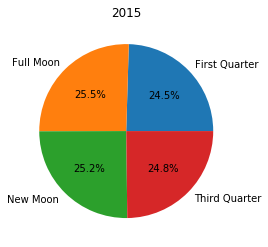

In [5]:
years = dfAccident['Year'].unique()

#for every year print out the ratio of accidents based on phase
for year in years:
    dfYear = dfAccident.query('Year == @year')
    gPhase = dfYear.groupby('Phase')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    plt.title(year)
    plt.show()

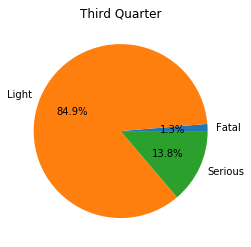

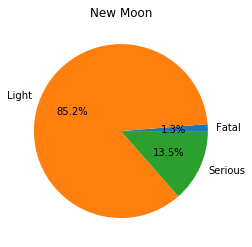

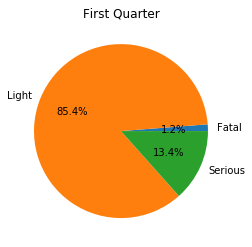

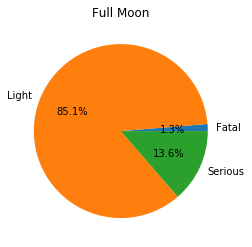

In [36]:
phases = dfAccident['Phase'].unique()
#comparing phase with accident severity
for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Accident_Severity')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    plt.title(phase)
    plt.show()

In [113]:
dfAccident['Number_of_Casualties'] = dfAccident['Number_of_Casualties'].astype(int)
dfAccident.loc[dfAccident['Number_of_Casualties'] > 3, 'Number_of_Casualties'] = 4

dfAccident['Number_of_Casualties'] = dfAccident['Number_of_Casualties'].astype(str)
dfAccident.loc[dfAccident['Number_of_Casualties'] == "4", 'Number_of_Casualties'] = '4+'

['1' '4' '3' '2' '5+']


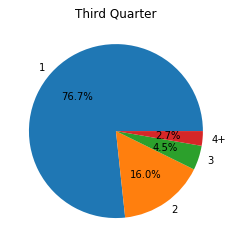

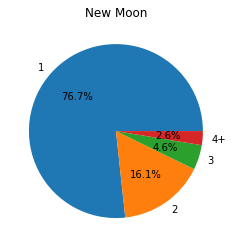

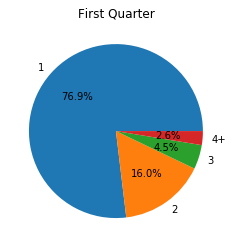

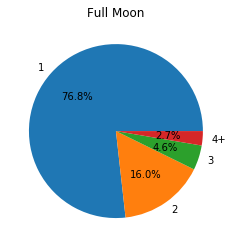

In [114]:
phases = dfAccident['Phase'].unique()

for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Number_of_Casualties')
    plt.pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    plt.title(phase)
    plt.show()

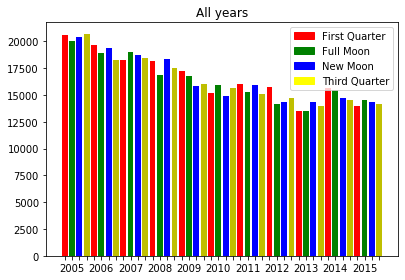

In [8]:
labels = []
for year in years:
    dfYear = dfAccident.query('Year == @year')
    gYear = dfYear.groupby('Phase')
    phaseCounts = dfYear['Phase'].value_counts().sort_index()
    phaseOrder = dfYear['Phase'].unique()
    plt.bar(height = phaseCounts, x = (phaseOrder + year), color = ['r', 'g', 'b', 'y'])
    #super ghetto
    labels.append('')
    labels.append(year)
    labels.append('')
    labels.append('')

legend_elements = [Patch(facecolor='red', edgecolor='red',label='First Quarter'),
                   Patch(facecolor='green', edgecolor='green',label='Full Moon'),
                   Patch(facecolor='blue', edgecolor='blue',label='New Moon'),
                   Patch(facecolor='yellow', edgecolor='yellow',label='Third Quarter')]
    
plt.legend(handles = legend_elements)
test = range(len(years) *4)
plt.title('All years')
plt.tight_layout()
plt.xticks(test, labels = labels)
plt.show()

In [9]:
#todo nab from mark
dfAccident['Hour'] = 0
for index, row in dfAccident.iterrows():
    try:
        time = row['Time']
        hour = time.split(':')[0]
        dfAccident.at[index, 'Hour'] = hour
    except:
        print(row['Time'])
        print(type(row['Time']))

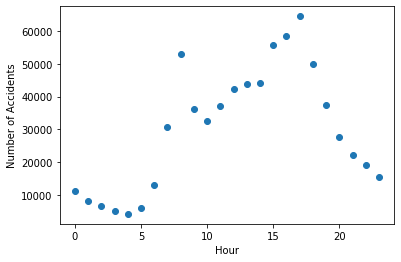

In [10]:
#TODO: nab from mark
gHour = dfAccident.groupby('Hour')

plt.scatter(gHour.count().index, (gHour['Date'].count()))
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

In [11]:
dfNonMoon = pd.read_csv('Resources/TotalAccidents_NonMoonPhase.csv')

dfNonMoon.head()

,Date,Total_Accidents
0,01-01-2005,308
1,01-01-2007,335
2,01-01-2009,244
3,01-01-2011,204
4,01-01-2013,262


In [115]:
#TODO: Stripping out the year and adding a year column
dfNonMoon['Year'] = 0
for index, row in dfNonMoon.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfNonMoon.at[index, 'Year'] = year
    
dfNonMoon.head()

,Date,Total_Accidents,Year
0,01-01-2005,308,2005
1,01-01-2007,335,2007
2,01-01-2009,244,2009
3,01-01-2011,204,2011
4,01-01-2013,262,2013


<BarContainer object of 11 artists>

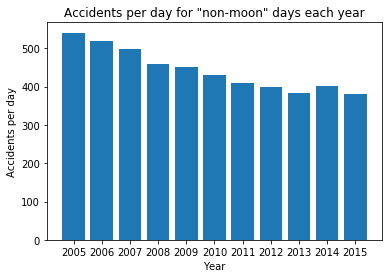

In [116]:
#For each year we calculate 
average = []
for year in years:
    dfYear = dfNonMoon.query('Year == @year')
    total = dfYear['Total_Accidents'].sum()
    average.append(total / len(dfYear['Year']))
plt.title('Accidents per day for "non-moon" days each year')
plt.xlabel('Year')
plt.ylabel('Accidents per day')
plt.bar(height = average, x = (years))

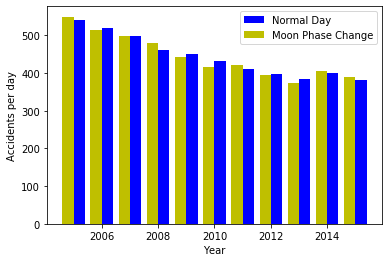

In [32]:
#TODO: add comments cleanup names title plot
yearsMoon = dfAccident['Year'].unique()
phases = dfAccident['Phase'].unique()
popAverage = average
averageMoon = []

for year in yearsMoon:
    dfYear = dfAccident.query('Year == @year')
    total = len(dfYear)
    averageMoon.append(total / len(dfYear['Date'].unique()))

#TODO: clean up this nonsense
yearsFloatMoon = [(float(year) - 0.2) for year in yearsMoon]
yearsFloatNo = [(float(year) + 0.2) for year in years]

plt.bar(height = average, x = yearsFloatNo , width = 0.4, color = 'b', label = 'Normal Day')
plt.bar(height = averageMoon, x =  yearsFloatMoon, width = 0.4, color = 'y', label = 'Moon Phase Change')

plt.legend()
plt.xlabel('Year')
plt.ylabel("Accidents per day")
plt.show()

In [17]:
#TODO: statistics stuff to back up what our graphs show
nat20 = stats.chi2.ppf(q = 0.95, df = 2)
print(nat20)

stats.chisquare(averageMoon, average)
#if im reading this right... these things are close to I...dentical
#which should mean that there is no correlation between moon phases and and the amount of car accidents

5.991464547107979


Power_divergenceResult(statistic=2.4156990972269257, pvalue=0.9920480652554976)

In [23]:
dfNonMoon.copy()

totalSum = []

for year in years:
    sumMoon = len(dfAccident.query('Year == @year'))
    sumNo = dfNonMoon.query('Year == @year')['Total_Accidents'].sum()
    
    totalSum.append((sumMoon + sumNo)/365)
    

In [25]:
totalSum

nat20 = stats.chi2.ppf(q = 0.95, df = 2)
print(nat20)

stats.chisquare(averageMoon, average)

5.991464547107979


Power_divergenceResult(statistic=2.4156990972269257, pvalue=0.9920480652554976)

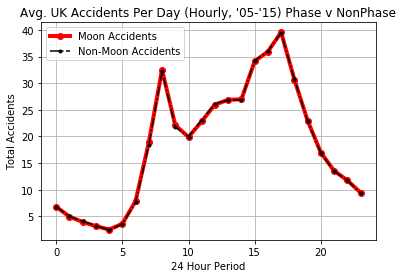

In [183]:
dfHourly = dfAccident.copy()

moondays = len(dfHourly['Date'].unique()) #get total moon phase days 2005-2015
nonmoondays = len(dfNonMoon['Date'].unique()) #get total non moon phase days

dfNonMoonHourly = pd.read_csv('Resources/TimeOfNonMoonPhaseAccidents.csv')
nonmoon_accidents = dfNonMoonHourly['Time'] / nonmoondays

dfHourly['Hour'] = pd.to_datetime(dfHourly['Time'], format='%H:%M').dt.hour
dfHourly_group = dfHourly.groupby(['Hour'])

dfTotalHours = dfHourly_group.count()
accidents = dfTotalHours['Phase'] / moondays #Phase is actually count of accidents as well

hours = np.arange(0, 24, 1)

moon_scatter, = plt.plot(hours, accidents, marker='o', color='red', label='Moon Accidents', linewidth = 4)
nonmoon_scatter, = plt.plot(hours, nonmoon_accidents, marker='.', color='k', label='Non-Moon Accidents', linestyle = '-.')

plt.title("Avg. UK Accidents Per Day (Hourly, '05-'15) Phase v NonPhase")
plt.xlabel('24 Hour Period')
plt.ylabel('Total Accidents')
plt.legend()
plt.grid()